# Examples from the PepFuNN manuscript

The following is the code to reproduce the examples provided in the manuscript. For that purpose we will test multiple functionalities, including similarity comparisons using molecular and monomer-based fingerprints, generation of libraries, calculation of sequences properties and definition of molecular matched pairs. For that purpose we will require to install two modules: pepfunn and lightgbm for logD estimation of the oligo-peptides. These can be installed using pip command:

In [ ]:
!pip install pepfunn lightgbm

### 1. Comparison of cyclic peptides from ChEMBL

For this example we will use a external dataset extracted from ChEMBL with a list of annotated head-to-tail cyclic peptides. The annotations will include the BILN format, and additional data to filter peptides containing only natural amino acids

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('chembl_cycle_peptides_Head_Tail.csv')
filtered_df = df.loc[df['len'] == df['aa_num']]
filtered_df

,chembl_id,biln,approved,phase,len,aa_num,nnaa_num,has_PK,mw,logp,psa,hba,hbd,rtb,heavy_atoms,num_ro5_violations,qed,logd,reference,smiles
0,CHEMBL276765,"P(1,1)-F-V-L-P-V-N(1,2)",No,0.0,7,7,0,No,766.94,0.03,229.21,8,6,8,55,2,0.21,0.03,No,CC(C)C[C@@H]1NC(=O)[C@H](C(C)C)NC(=O)[C@H](Cc2...
7,CHEMBL289861,"F(1,1)-G-G-G-Y-G(1,2)",No,0.0,6,6,0,No,538.56,-2.49,194.83,7,7,4,39,2,0.23,-2.49,No,O=C1CNC(=O)CNC(=O)[C@H](Cc2ccccc2)NC(=O)CNC(=O...
8,CHEMBL42623,"G(1,1)-Y-G-F(1,2)",No,0.0,4,4,0,No,424.46,-0.27,136.63,5,5,4,31,0,0.45,-0.28,No,O=C1CNC(=O)[C@H](Cc2ccccc2)NC(=O)CNC(=O)[C@H](...
10,CHEMBL42285,"F(1,1)-G-G-Y-G(1,2)",No,0.0,5,5,0,No,481.51,-1.38,165.73,6,6,4,35,1,0.31,-1.38,No,O=C1CNC(=O)[C@H](Cc2ccccc2)NC(=O)CNC(=O)[C@H](...
13,CHEMBL44258,"Y(1,1)-G-F-G-D(1,2)",No,0.0,5,5,0,No,539.55,-1.45,203.03,7,7,6,39,2,0.23,-4.65,No,O=C(O)C[C@@H]1NC(=O)CNC(=O)[C@H](Cc2ccccc2)NC(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,CHEMBL3747478,"L(1,1)-G-A-F-G-N-L-G-S(1,2)",No,0.0,9,9,0,No,816.91,-4.87,325.22,11,11,9,58,3,0.11,-4.87,No,CC(C)C[C@@H]1NC(=O)[C@H](CO)NC(=O)CNC(=O)[C@H]...
1182,CHEMBL3787079,"L(1,1)-F-I-M-L-V-F-P(1,2)",No,0.0,8,8,0,No,961.28,4.67,224.01,9,7,14,68,2,0.15,4.67,No,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[...
1183,CHEMBL3810352,"I(1,1)-V-P-Y-F-G-P-P(1,2)",No,0.0,8,8,0,No,871.05,1.19,226.66,9,6,7,63,2,0.23,1.18,10.1016/j.ejmech.2016.04.001,CC[C@H](C)[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@@H]...
1186,CHEMBL3827893,"K(1,1)-R-L-S-K-D(1,2)",No,0.0,6,6,0,No,727.86,-7.45,346.07,11,13,17,51,3,0.04,-11.68,10.1016/j.bmc.2016.06.042,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...


Then we go through the dataframe rows in order to extract in lists information required for the clustering like the IDs, sequences and molfiles:

In [3]:
# Process data
from rdkit import Chem
from pepfunn.sequence import get_peptide

# Lists required for the similarity clustering
ids=[]
molfiles=[]
biln_list=[]
sequences=[]

# Iterate over the dataframe rows
for index,row in filtered_df.iterrows():
    ids.append(row['chembl_id'])
    mol=Chem.MolFromSmiles(row['smiles'])
    molfiles.append(Chem.MolToMolBlock(mol))
    biln=row['biln']
    biln_list.append(biln)
    fasta=get_peptide(biln)
    sequences.append(fasta)

With the sequences and the molfiles in separated lists, we can call the simClustering class and run the clustering similarity analysis

In [4]:
from pepfunn.clustering import simClustering

clust = simClustering(ids=ids, molfiles=molfiles, sequences=sequences)
clust.run_clustering()

Based on the clusters, we can select one molecule of reference and check the closest neighbors based on the molecular fingerprint similarity

In [6]:
# Calculate neighbors for one molecule
neighbors=clust.get_sim_reference('CHEMBL276765')

top10=[]
for i,comp in enumerate(neighbors):
    top10.append(comp)
    print(f'{comp}, similarity: {neighbors[comp]}, sequence: {biln_list[ids.index(comp)]}')
    if i==10:
        break

CHEMBL276765, similarity: 1.0, sequence: P(1,1)-F-V-L-P-V-N(1,2)
CHEMBL1793965, similarity: 0.8803418803418803, sequence: P(1,1)-F-I-L-P-V-N(1,2)
CHEMBL326783, similarity: 0.7692307692307693, sequence: P(1,1)-V-N-P-F-V-V(1,2)
CHEMBL3425643, similarity: 0.6058394160583942, sequence: F(1,1)-F-W-V-L-P(1,2)
CHEMBL2012806, similarity: 0.5347222222222222, sequence: P(1,1)-F-V-F-L-E-C(1,2)
CHEMBL3354985, similarity: 0.5251798561151079, sequence: I(1,1)-F-Y-L-P-L-P(1,2)
CHEMBL3400929, similarity: 0.5151515151515151, sequence: L(1,1)-P-Y-L-F-L(1,2)
CHEMBL2012807, similarity: 0.5099337748344371, sequence: V(1,1)-F-L-R-C-P-F(1,2)
CHEMBL2012805, similarity: 0.5034013605442177, sequence: P(1,1)-F-V-F-L-M-C(1,2)
CHEMBL454186, similarity: 0.4859154929577465, sequence: F(1,1)-P-L-P-Y-P-I(1,2)
CHEMBL444775, similarity: 0.4825174825174825, sequence: P(1,1)-Q-P-F-P-F-I-F(1,2)


We can also attempt finding neighbors using the monomer-based fingerprints. First we build the fingerprints, and then we print the top10 similar using the same structure of the previous case:

In [7]:
from pepfunn.similarity import monomerFP

fingerprints=[]
for biln in biln_list:
    fp1, dict_fp1=monomerFP(biln, radius=2, nBits=1024, add_freq=True)
    fingerprints.append(fp1)

In [8]:
from pepfunn.similarity import only_simMonFP

sim_dict={}
# Calculate neighbors for the reference
ind_val=ids.index('CHEMBL276765')
for i,id_val in enumerate(ids):
    if i!=0:
        sim=only_simMonFP(fingerprints[0],fingerprints[i])
        sim_dict[id_val]=sim

In [9]:
sort_neighbors = dict(sorted(sim_dict.items(), key=lambda item: item[1], reverse=True))

top10=[]
for i,comp in enumerate(sort_neighbors):
    top10.append(comp)
    print(f'{comp}, similarity: {sort_neighbors[comp]}, sequence: {biln_list[ids.index(comp)]}')
    if i==10:
        break

CHEMBL326783, similarity: 0.5263157894736842, sequence: P(1,1)-V-N-P-F-V-V(1,2)
CHEMBL1793965, similarity: 0.47619047619047616, sequence: P(1,1)-F-I-L-P-V-N(1,2)
CHEMBL3354984, similarity: 0.3333333333333333, sequence: N(1,1)-V-I-P-L-L-P(1,2)
CHEMBL2012807, similarity: 0.28, sequence: V(1,1)-F-L-R-C-P-F(1,2)
CHEMBL3120660, similarity: 0.28, sequence: P(1,1)-I-S-F-V-P-W(1,2)
CHEMBL1813222, similarity: 0.23076923076923078, sequence: T(1,1)-P-T-F-P-V-G-L(1,2)
CHEMBL3787079, similarity: 0.23076923076923078, sequence: L(1,1)-F-I-M-L-V-F-P(1,2)
CHEMBL452942, similarity: 0.2222222222222222, sequence: P(1,1)-V-L-Y-P-V-A-F(1,2)
CHEMBL3810352, similarity: 0.21428571428571427, sequence: I(1,1)-V-P-Y-F-G-P-P(1,2)
CHEMBL446384, similarity: 0.2, sequence: P(1,1)-I-V-A-A-F-T-P-A(1,2)
CHEMBL1077555, similarity: 0.2, sequence: P(1,1)-P-A-T-P-F-V(1,2)


Finally we can also cluster the molecules using a set of molecular descriptors available in the RDKit. We can use the propClustering class and generate the plot:

In [10]:
from pepfunn.clustering import propClustering

# Run property clustering
pc = propClustering(ids=ids, molfiles=molfiles, sequences=sequences)

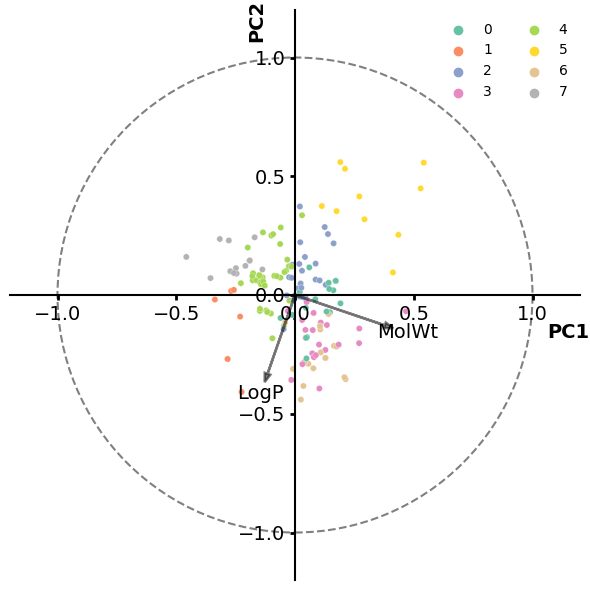

In [19]:
pc.plot_PCA(add_cluster=True, print_arrows=True, legends=True, out_name='properties_cyclic_peptides.png')

### 2. Library generation and molecular matched pairs analysis

In the second example we will generate a library of peptides based on an initial seed, and then calculate two molecular descriptors, the molecular weight and the logD using a trained model available. First we create the library:

In [12]:
from pepfunn.library import Library

libtest=Library(population_size=100, mode='scanning', mode_scan='all', seeds=['FNCREWCWN'], pairs=[(2,'A'),(3,'L'),(5,'R'),(7,'M')], positions=[2,3,5,7], from_child=True, verbose=False)
libtest.population[0:10]

['FNCREWDWN',
 'FACREWCWN',
 'FFCREWDWN',
 'FACREWDWN',
 'FFCREWIWN',
 'FACRMWDWN',
 'FACRMWMWN',
 'FACRRWDWN',
 'FFCRWWDWN',
 'FNCRNWCWN']

Then we calculate the properties using the lightgbm module for the logD calculation and the RDKit for the molecular weight:

In [13]:
import sys
import os
import lightgbm as lgbm
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

class LogDPredictor:
    def __init__(self,model_file_name):
        if not os.path.exists(model_file_name):
            print(f"Error: Could not find model file {model_file_name}",file=sys.stderr)
            sys.exit(0)

        self.mdl = lgbm.Booster(model_file=model_file_name)
        self.descList = self.mdl.feature_name()
        self.fns = [(x,y) for x,y in Descriptors.descList if x in self.descList]

    def predict_smiles(self,smi):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            return self.predict(mol)
        else:
            return None

    def predict(self,mol):
        res = []
        for x,y in self.fns:
            res.append(y(mol))
        return self.mdl.predict([res])[0]

In [14]:
logd_predictor = LogDPredictor("model_logd.txt")

dict_comparison={'ID':[], 'Sequence':[], 'MW':[], 'logD':[]}

for i,seq in enumerate(libtest.population):
    name=f'TEST{i+1}'
    helm = ".".join(list(seq))
    mol = Chem.MolFromHELM("PEPTIDE1{%s}$$$$" % helm)
    mw = Descriptors.MolWt(mol)
    pred_logd = logd_predictor.predict(mol)

    dict_comparison['ID'].append(name)
    dict_comparison['Sequence'].append(seq)
    dict_comparison['MW'].append(mw)
    dict_comparison['logD'].append(pred_logd)

df = pd.DataFrame(dict_comparison)
df  

,ID,Sequence,MW,logD
0,TEST1,FNCREWDWN,1269.366,-12.720375
1,TEST2,FACREWCWN,1214.399,-7.993580
2,TEST3,FFCREWDWN,1302.439,-10.790092
3,TEST4,FACREWDWN,1226.341,-12.399901
4,TEST5,FFCREWIWN,1300.511,-5.691490
...,...,...,...,...
95,TEST96,FNVRYWHWN,1321.468,-5.946301
96,TEST97,FFCRNWDWN,1287.428,-8.971460
97,TEST98,FACREWNWN,1225.357,-9.193848
98,TEST99,FALRDWFWN,1254.417,-6.036589


With the dataframe as an input, we can calculate the matched pairs using the initial seed as the reference peptide, an assigning as the properties to compare the MW and logD. This will work to check which mutation are driving the increase of logD values within the library

In [15]:
# Import pandas
from pepfunn.pairs import MatchedPairs
property_columns = ['MW', 'logD']
id_column='ID'
seq_column='Sequence'

# Reference substrate
reference='FNCREWCWN'

In [16]:
df_sequences = MatchedPairs.get_sequences(df, id_column=id_column, seq_column=seq_column, seq_ref=reference)
df_sequences

,ID,Begin,End,Peptide,REF
0,TEST1,,,FNCREWDWN,FNCREWDWN
1,TEST2,,,FACREWCWN,FACREWCWN
2,TEST3,,,FFCREWDWN,FFCREWDWN
3,TEST4,,,FACREWDWN,FACREWDWN
4,TEST5,,,FFCREWIWN,FFCREWIWN
...,...,...,...,...,...
95,TEST96,,,FNVRYWHWN,FNVRYWHWN
96,TEST97,,,FFCRNWDWN,FFCRNWDWN
97,TEST98,,,FACREWNWN,FACREWNWN
98,TEST99,,,FALRDWFWN,FALRDWFWN


With the annotated sequences, we can calculate the ration of the MW and the difference in logD to do the comparisons

In [17]:
df_pairs = MatchedPairs.get_pairs(df, df_sequences, property_columns, operation_columns=['divide', 'substract'])
df_pairs

,ID_A,ID_B,Mutations,Distance,Diff_MW,Min_MW,Max_MW,Diff_logD,Min_logD,Max_logD
0,TEST1,TEST2,(2)N/A | (7)D/C,2,1.045263,1214.399,1269.366,-4.726795,-12.720375,-7.993580
1,TEST1,TEST3,(2)N/F,1,0.974607,1269.366,1302.439,-1.930283,-12.720375,-10.790092
2,TEST1,TEST4,(2)N/A,1,1.035084,1226.341,1269.366,-0.320474,-12.720375,-12.399901
3,TEST1,TEST5,(2)N/F | (7)D/I,2,0.976052,1269.366,1300.511,-7.028885,-12.720375,-5.691490
4,TEST1,TEST6,(2)N/A | (5)E/M,2,1.033327,1228.426,1269.366,-4.632017,-12.720375,-8.088359
...,...,...,...,...,...,...,...,...,...,...
9895,TEST99,TEST97,(2)A/F | (3)L/C | (5)D/N | (7)F/D,4,0.974359,1254.417,1287.428,2.934870,-8.971460,-6.036589
9896,TEST100,TEST97,(2)N/F | (3)F/C | (5)R/N | (7)S/D,4,1.019444,1287.428,1312.461,-2.729328,-11.700788,-8.971460
9897,TEST99,TEST98,(3)L/C | (5)D/E | (7)F/N,3,1.023716,1225.357,1254.417,3.157259,-9.193848,-6.036589
9898,TEST100,TEST98,(2)N/A | (3)F/C | (5)R/E | (7)S/N,4,1.071085,1225.357,1312.461,-2.506940,-11.700788,-9.193848


With the obtained dataframe, we can filter the most interesting pairs based on the maximum number of mutations, and those cases where the MW is increased and the logD difference is positive:

In [18]:
filtered_df = df_pairs[(df_pairs['Diff_MW'] > 1) &
                        (df_pairs['Diff_logD'] > 0)  &
                        (df_pairs['Distance'] <= 1)]
filtered_df

,ID_A,ID_B,Mutations,Distance,Diff_MW,Min_MW,Max_MW,Diff_logD,Min_logD,Max_logD
39,TEST1,TEST41,(3)C/T,1,1.001610,1267.325,1269.366,0.088378,-12.808753,-12.720375
120,TEST2,TEST24,(7)C/G,1,1.039454,1168.305,1214.399,0.611495,-8.605075,-7.993580
181,TEST2,TEST85,(5)E/N,1,1.012516,1199.388,1214.399,1.007526,-9.001105,-7.993580
197,TEST3,TEST4,(2)F/A,1,1.062053,1226.341,1302.439,1.609809,-12.399901,-10.790092
230,TEST3,TEST37,(2)F/C,1,1.034989,1258.408,1302.439,1.470693,-12.260785,-10.790092
...,...,...,...,...,...,...,...,...,...,...
9293,TEST89,TEST65,(3)F/L,1,1.026057,1305.470,1339.487,0.028967,-11.729755,-11.700788
9560,TEST86,TEST74,(5)R/E,1,1.020644,1311.451,1338.525,1.666909,-13.266018,-11.599110
9642,TEST96,TEST77,(5)Y/E,1,1.026457,1287.407,1321.468,3.498334,-9.444636,-5.946301
9724,TEST96,TEST81,(5)Y/N,1,1.038567,1272.396,1321.468,4.932445,-10.878746,-5.946301


For any questions, please contact: raoc@novonordisk.com